# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
print(tf.__version__)

2.14.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [4]:
a = tf.constant(2)

a

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [5]:
b = tf.constant([2, 3])

b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 3])>

In [6]:
c = tf.constant([
    [2, 3],
    [6, 7]
])

c

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [6, 7]])>

In [7]:
d = tf.constant(["Hello"])

d

<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Hello'], dtype=object)>

### 난수 생성

In [8]:
rand = tf.random.uniform([1], 0, 1)

rand

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.36976397], dtype=float32)>

In [9]:
rand2 = tf.random.normal([1, 2], 0, 1)

rand2

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 1.6033391, -0.5021258]], dtype=float32)>

In [10]:
rand3 = tf.random.normal(shape=(3, 2))

rand3

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.206374  , -0.09630413],
       [ 1.3503157 ,  1.156239  ],
       [ 0.40979475,  0.6984594 ]], dtype=float32)>

### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [11]:
a = tf.constant(3)
b = tf.constant(2)

In [12]:
print(tf.add(a, b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [13]:
print(tf.subtract(a, b))
print(a - b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [14]:
print(tf.multiply(a, b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [15]:
c = tf.add(a, b).numpy()

print(type(c))

<class 'numpy.int32'>


In [16]:
c_square = np.square(c)
c_tensor = tf.convert_to_tensor(c_square)

c_tensor

<tf.Tensor: shape=(), dtype=int32, numpy=25>

### 넘파이처럼 사용하기


In [17]:
t = tf.constant([
    [1, 2, 3],
    [4, 5, 6]
])

print(t.shape, t.dtype)

(2, 3) <dtype: 'int32'>


In [18]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [5, 6]])>

In [19]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[2],
       [5]])>

In [20]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]])>

In [21]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]])>

In [22]:
t @ tf.transpose(t) # @는 tensor의 곱

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]])>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [23]:
a = tf.constant(2)
b = tf.constant(2.)

In [24]:
a + tf.cast(b, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능

In [25]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [26]:
@tf.function
def my_func(x):
    return x ** 2 - 10 * x + 3

print(my_func(2))
print(my_func(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [27]:
def my_func_(x):
    return x ** 2 - 10 * x + 3

print(my_func_(2)) # tensor 아님
print(my_func_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [28]:
tf_my_func = tf.function(my_func_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [29]:
tf_my_func.python_function(2)

-13

In [30]:
def func_to_get_faster(x, y, b):
    x = tf.matmul(x, y)
    x = x + b

    return x

a_func_that_uses_a_graph = tf.function(func_to_get_faster)

x1 = tf.constant([[1, 2]])
y1 = tf.constant([[2], [3]])
b1 = tf.constant(4)

a_func_that_uses_a_graph(x1, y1, b1)

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[12]])>

In [31]:
def inner_func(x, y, b):
    x = tf.matmul(x, y)
    x = x + b

    return x

@tf.function
def outer_func(x):
    y = tf.constant([[2], [3]])
    b = tf.constant(4)

    return inner_func(x, y, b)

outer_func(tf.constant([[1, 2]]))

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[12]])>

텐서플로우가 `tf.function`으로 변환한 코드

In [32]:
print(tf.autograph.to_code(my_func.python_function))

def tf__my_func(x):
    with ag__.FunctionScope('my_func', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.ld(x) ** 2 - 10 * ag__.ld(x) + 3
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)




 속도 향상


In [33]:
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense_1 = tf.keras.layers.Dense(128, activation="relu")
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)

        return x

inp_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print(f"Eager time: {timeit.timeit(lambda: eager_model(inp_data), number=1000)}")
print(f"Graph time: {timeit.timeit(lambda: graph_model(inp_data), number=1000)}")

Eager time: 2.520551799999339
Graph time: 0.8310162999996464


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [34]:
X = tf.Variable(20.0)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [35]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x ** 2

In [36]:
dy_dx = tape.gradient(y, x)

dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [37]:
# x2 = tf.Variable(4)
# dy_dx = tape.gradient(y, x2)

# dy_dx # 한 번만 호출 가능

In [38]:
x = tf.Variable(2.)
y = tf.Variable(3.)

with tf.GradientTape() as tape:
    y_sq = y ** 2
    z = x ** 2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {"x": x, "y": y})

print(f"dz/dx: {grad['x']}")
print(f"dz/dy: {grad['y']}")

dz/dx: 4.0
dz/dy: None


In [39]:
weights = tf.Variable(tf.random.normal((3, 2)), name="weights")
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name="biases")
x = tf.constant([[1, 2, 3]], dtype=tf.float32)

with tf.GradientTape(persistent=True) as tape2:
    y = x @ weights + biases
    loss = tf.reduce_mean(y ** 2)

In [40]:
[dl_dw, dl_db] = tape2.gradient(loss, [weights, biases])

In [41]:
print(weights.shape, dl_dw.shape)

(3, 2) (3, 2)


In [42]:
with tape2:
    weights2 = tf.Variable(tf.random.normal((3, 2)), name="weights")
    biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name="biases")
    x2 = tf.constant([[4, 5, 6]], dtype=tf.float32)
    y2 = x2 @ weights2 + biases2
    loss2 = tf.reduce_mean(y2 ** 2)


[dl_dw2, dl_db2] = tape2.gradient(loss2, [weights2, biases2])

In [43]:
print(weights2.shape, dl_dw2.shape)

(3, 2) (3, 2)


In [44]:
del tape2

In [45]:
import tensorflow as tf

weights = tf.Variable(tf.random.normal((3, 2)), name="weights")
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name="biases")
x = tf.constant([[1, 2, 3]], dtype=tf.float32)

with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y ** 2)

[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

# Calculate gradients for weights2 and biases2 within the tape context
with tape:
    y2 = x2 @ weights2 + biases2  # Reuse tape for subsequent calculations
    loss2 = tf.reduce_mean(y2 ** 2)

[dl_dw2, dl_db2] = tape.gradient(loss2, [weights2, biases2])

print(weights2.shape, dl_dw2.shape)  # Output: (3, 2) (3, 2)


(3, 2) (3, 2)


## 간단한 신경망 구조

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [46]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Neuron(x, W, b=0):
    z = x * W + b
    
    return sigmoid(z)

In [47]:
x = tf.random.normal((1, 2), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print(f"x's shape: {x.shape}")
print(f"W's shape: {W.shape}")

print(x)
print(W)

print(Neuron(x, W))

x's shape: (1, 2)
W's shape: (1, 2)
tf.Tensor([[ 0.1836892 -0.8415326]], shape=(1, 2), dtype=float32)
tf.Tensor([[ 1.1914693 -0.3152123]], shape=(1, 2), dtype=float32)
[[0.55449766 0.56592923]]


In [48]:
x = tf.random.normal((2, 1), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print(f"x's shape: {x.shape}")
print(f"W's shape: {W.shape}")

print(x)
print(W)

print(Neuron(x, W))

x's shape: (2, 1)
W's shape: (2, 1)
tf.Tensor(
[[-0.06256317]
 [ 0.67927736]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.35965863]
 [2.9231534 ]], shape=(2, 1), dtype=float32)
[[0.49437487]
 [0.87928027]]


In [49]:
x = tf.random.normal((1, ), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print(f"x's shape: {x.shape}")
print(f"W's shape: {W.shape}")

print(x)
print(W)

print(Neuron(x, W))

x's shape: (1,)
W's shape: (2, 1)
tf.Tensor([-0.13852245], shape=(1,), dtype=float32)
tf.Tensor(
[[-0.33228534]
 [-0.65867877]], shape=(2, 1), dtype=float32)
[[0.51150525]
 [0.52279466]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [50]:
x = 1
y = 0
W = tf.random.normal((1, ), 0, 1)

print(Neuron(x, W))
print(f"y: {y}")

[0.4643138]
y: 0


In [51]:
for i in range(1000):
    output = Neuron(x, W)
    error = y - output
    W = W + 0.1 * error * x

    if i % 100 == 99:
        print(f"Epoch: {i + 1}, Error: {error}, Output: {output}")

Epoch: 100, Error: [-0.09931193], Output: [0.09931193]
Epoch: 200, Error: [-0.05155979], Output: [0.05155979]
Epoch: 300, Error: [-0.03448852], Output: [0.03448852]
Epoch: 400, Error: [-0.02583198], Output: [0.02583198]
Epoch: 500, Error: [-0.0206218], Output: [0.0206218]
Epoch: 600, Error: [-0.01714865], Output: [0.01714865]
Epoch: 700, Error: [-0.0146707], Output: [0.0146707]
Epoch: 800, Error: [-0.01281515], Output: [0.01281515]
Epoch: 900, Error: [-0.01137423], Output: [0.01137423]
Epoch: 1000, Error: [-0.01022333], Output: [0.01022333]


In [52]:
def Neuron2(x, W, b=0):
    z = tf.matmul(x, W, transpose_b=True) + b

    return sigmoid(z)

In [53]:
x = tf.random.normal((1, 3))
y = tf.ones(1)
W = tf.random.normal((1, 3))

print(Neuron2(x, W))
print(f"y: {y}")

[[0.08542656]]
y: [1.]


In [54]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    W = W + 0.1 * error * W
    
    if i % 100 == 99:
        print(f"Epoch: {i + 1}, Error: {error}, Output: {output}")

Epoch: 100, Error: [[1.]], Output: [[0.]]
Epoch: 200, Error: [[1.]], Output: [[0.]]


C:\Users\kksoo\AppData\Local\Temp\ipykernel_1412\2347141400.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 300, Error: [[1.]], Output: [[0.]]
Epoch: 400, Error: [[1.]], Output: [[0.]]
Epoch: 500, Error: [[1.]], Output: [[0.]]
Epoch: 600, Error: [[1.]], Output: [[0.]]
Epoch: 700, Error: [[1.]], Output: [[0.]]
Epoch: 800, Error: [[1.]], Output: [[0.]]
Epoch: 900, Error: [[1.]], Output: [[0.]]
Epoch: 1000, Error: [[nan]], Output: [[nan]]


In [55]:
x = tf.random.normal((1, 3))
weights = tf.random.normal((1, 3))
bias = tf.zeros((1, 1))

y = tf.ones((1, ))

print(f"x\t: {x}")
print(f"weights\t: {weights}")
print(f"bias\t: {bias}")

x	: [[-1.2535696 -0.336615   0.3806665]]
weights	: [[ 0.19353518  1.9062386  -0.3169698 ]]
bias	: [[0.]]


In [56]:
for i in range(1000):
    ouput = Neuron2(x, weights, bias)
    error = y - output
    weights = weights + 0.1 * error * weights
    bias = bias + 1 * 0.1 * error

    if i % 100 == 99:
        print(f"Epoch: {i + 1}, Error: {error}, Output: {output}")

Epoch: 100, Error: [[nan]], Output: [[nan]]
Epoch: 200, Error: [[nan]], Output: [[nan]]
Epoch: 300, Error: [[nan]], Output: [[nan]]
Epoch: 400, Error: [[nan]], Output: [[nan]]
Epoch: 500, Error: [[nan]], Output: [[nan]]
Epoch: 600, Error: [[nan]], Output: [[nan]]
Epoch: 700, Error: [[nan]], Output: [[nan]]
Epoch: 800, Error: [[nan]], Output: [[nan]]
Epoch: 900, Error: [[nan]], Output: [[nan]]
Epoch: 1000, Error: [[nan]], Output: [[nan]]


In [57]:
print(f"x\t: {x}")
print(f"weights\t: {weights}")
print(f"bias\t: {bias}")

x	: [[-1.2535696 -0.336615   0.3806665]]
weights	: [[nan nan nan]]
bias	: [[nan]]


### AND Gate

In [58]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
Y = np.array([[0], [0], [0], [1]])

W = tf.random.normal([2])
b = tf.random.normal([1])
b_x = 1

for i in range(2_000):
    error_sum = 0
    for j in range(X.shape[0]):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
    
    if i % 200 == 200 - 1:
        print(f"Epoch: {i + 1}, Error: {error}, Output: {output}")

print(f"\nweights\t: {W}")
print(f"bias\t: {b}")

Epoch: 200, Error: [0.258604], Output: [0.741396]


Epoch: 400, Error: [0.15568954], Output: [0.84431046]
Epoch: 600, Error: [0.1105141], Output: [0.8894859]
Epoch: 800, Error: [0.08529198], Output: [0.914708]
Epoch: 1000, Error: [0.06928116], Output: [0.93071884]
Epoch: 1200, Error: [0.0582515], Output: [0.9417485]
Epoch: 1400, Error: [0.05020773], Output: [0.94979227]
Epoch: 1600, Error: [0.04409015], Output: [0.95590985]
Epoch: 1800, Error: [0.03928596], Output: [0.96071404]
Epoch: 2000, Error: [0.03541535], Output: [0.96458465]

weights	: [6.9677696 6.964609 ]
bias	: [-11.6172]


In [59]:
for i in range(X.shape[0]):
    print(f"X: {X[i]}, Y: {Y[i]}, Output: {sigmoid(np.sum(X[i] * W) + b)}")

X: [0 0], Y: [0], Output: [9.009699e-06]
X: [0 1], Y: [0], Output: [0.00944677]
X: [1 0], Y: [0], Output: [0.00947639]
X: [1 1], Y: [1], Output: [0.9101263]


### OR Gate

In [60]:
X_2 = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
Y_2 = np.array([[0], [1], [1], [1]])

W_2 = tf.random.normal([2])
b_2 = tf.random.normal([1])
b_x = 1

for i in range(2_000):
    error_sum = 0
    for j in range(X_2.shape[0]):
        output = sigmoid(np.sum(X_2[j] * W_2) + b_x + b_2)
        error = Y_2[j][0] - output
        W_2 = W_2 + X_2[j] * 0.1 * error
        b_2 = b_2 + b_x * 0.1 * error
        error_sum += error
    
    if i % 200 == 200 - 1:
        print(f"Epoch: {i + 1}, Error: {error}, Output: {output}")

print(f"\nweights\t: {W_2}")
print(f"bias\t: {b_2}")

Epoch: 200, Error: [0.00239372], Output: [0.9976063]
Epoch: 400, Error: [0.00036204], Output: [0.99963796]
Epoch: 600, Error: [0.00010967], Output: [0.9998903]
Epoch: 800, Error: [4.6133995e-05], Output: [0.99995387]
Epoch: 1000, Error: [2.336502e-05], Output: [0.99997663]
Epoch: 1200, Error: [1.335144e-05], Output: [0.99998665]
Epoch: 1400, Error: [8.34465e-06], Output: [0.99999166]
Epoch: 1600, Error: [5.6028366e-06], Output: [0.9999944]
Epoch: 1800, Error: [3.8146973e-06], Output: [0.9999962]
Epoch: 2000, Error: [2.861023e-06], Output: [0.99999714]

weights	: [8.20958  8.212126]
bias	: [-4.6373158]


In [61]:
for i in range(X_2.shape[0]):
    print(f"X_2: {X_2[i]}, Y_2: {Y_2[i]}, Output: {sigmoid(np.sum(X_2[i] * W_2) + b_2)}")

X_2: [0 0], Y_2: [0], Output: [0.00959078]
X_2: [0 1], Y_2: [1], Output: [0.97274303]
X_2: [1 0], Y_2: [1], Output: [0.97267544]
X_2: [1 1], Y_2: [1], Output: [0.9999924]


### XOR Gate

In [62]:
X_3 = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
Y_3 = np.array([[0], [1], [1], [0]])

W_3 = tf.random.normal([2])
b_3 = tf.random.normal([1])
b_x = 1

for i in range(2_000):
    error_sum = 0
    for j in range(X_3.shape[0]):
        output = sigmoid(np.sum(X_3[j] * W_3) + b_x + b_3)
        error = Y_3[j][0] - output
        W_3 = W_3 + X_3[j] * 0.1 * error
        b_3 = b_3 + b_x * 0.1 * error
        error_sum += error
    
    if i % 200 == 200 - 1:
        print(f"Epoch: {i + 1}, Error: {error}, Output: {output}")

print(f"\nweights\t: {W_3}")
print(f"bias\t: {b_3}")

Epoch: 200, Error: [-0.51318973], Output: [0.51318973]
Epoch: 400, Error: [-0.51283336], Output: [0.51283336]
Epoch: 600, Error: [-0.5128183], Output: [0.5128183]
Epoch: 800, Error: [-0.51281774], Output: [0.51281774]
Epoch: 1000, Error: [-0.51281774], Output: [0.51281774]
Epoch: 1200, Error: [-0.51281774], Output: [0.51281774]
Epoch: 1400, Error: [-0.51281774], Output: [0.51281774]
Epoch: 1600, Error: [-0.51281774], Output: [0.51281774]
Epoch: 1800, Error: [-0.51281774], Output: [0.51281774]
Epoch: 2000, Error: [-0.51281774], Output: [0.51281774]

weights	: [-0.10256235 -0.0512806 ]
bias	: [-0.94872004]


In [63]:
for i in range(X_3.shape[0]):
    print(f"X_3: {X_3[i]}, Y_3: {Y_3[i]}, Output: {sigmoid(np.sum(X_3[i] * W_3) + b_3)}")

X_3: [0 0], Y_3: [0], Output: [0.2791423]
X_3: [0 1], Y_3: [1], Output: [0.2689413]
X_3: [1 0], Y_3: [1], Output: [0.25897893]
X_3: [1 1], Y_3: [0], Output: [0.24926]


In [64]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
np.random.seed(111)

X_4 = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
Y_4 = np.array([[0], [1], [1], [0]])

model = Sequential([
    Dense(units=2, activation="sigmoid", input_shape=(2, )),
    Dense(units=1, activation="sigmoid")
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss="mse")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
history = model.fit(X_4, Y_4, epochs=5_000, batch_size=1, verbose=0)

In [66]:
model.predict(X_4)

1/1 [==============================] - 0s 102ms/step


array([[0.06774994],
       [0.9207315 ],
       [0.9204915 ],
       [0.10406314]], dtype=float32)

## 시각화 사용

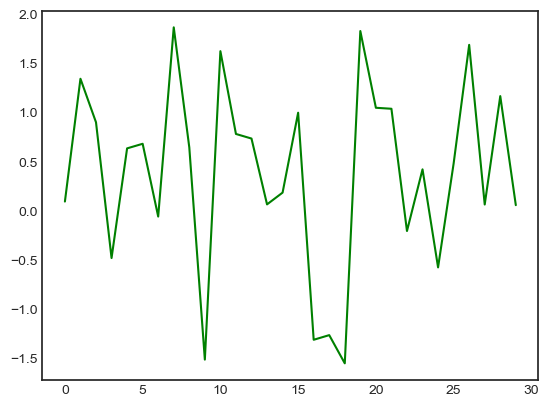

In [74]:
import matplotlib.pyplot as plt

x = tf.range(30)
y = tf.random.normal((30, ))
plt.plot(x, y, "g-")

plt.show()

### XOR Gate의 'LOSS' 시각화


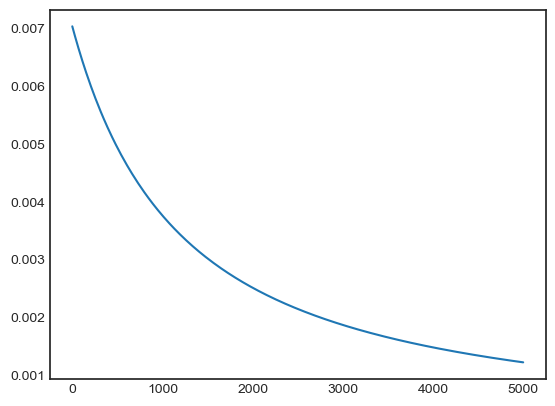

In [76]:
plt.plot(history.history["loss"])

plt.show()